In [14]:
import math
import cv2 as cv
import matplotlib.pyplot as plt

In [15]:
def showImage(img):
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(img)

    plt.show()

def readImage(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

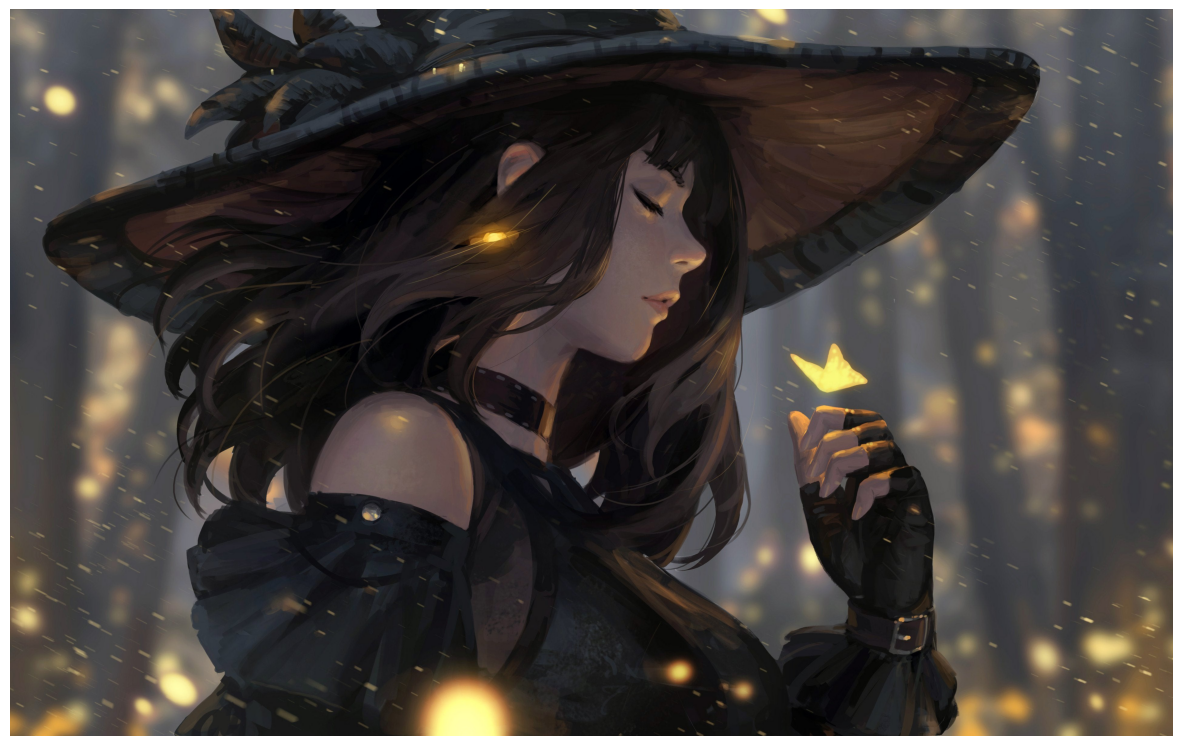

In [16]:
img1 = readImage('img/girl.jpg')
showImage(img1)

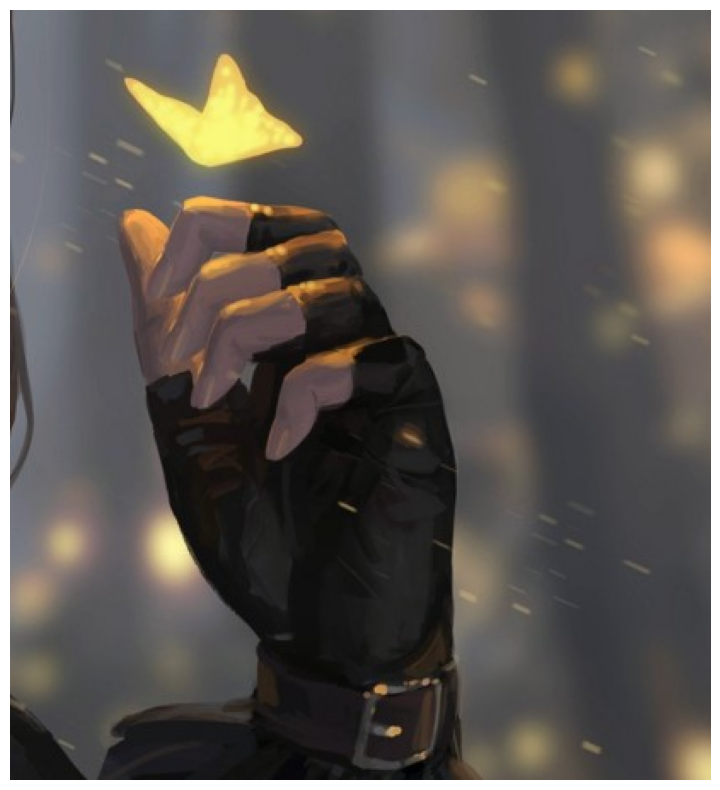

In [17]:
img2 = readImage('img/hand.jpg')
showImage(img2)

In [18]:
def rotateImage(img):
    h, w = img.shape[:2]

    M = cv.getRotationMatrix2D((w/2, h/2), 45, 1)

    cos = abs(M[0, 0])
    sin = abs(M[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    M[0, 2] += (new_w / 2) - (w / 2)
    M[1, 2] += (new_h / 2) - (h / 2)

    rotated_img = cv.warpAffine(img, M, (new_w, new_h)) # виконує транслацію, поворот, афінні перетворення

    return rotated_img

In [19]:
def hamming_distance(x, y):
    assert len(x) == len(y)
    return sum([(a != b) for a, b in zip(x, y)])

def get_keypoints_and_descriptors(img):
    detector = cv.xfeatures2d.StarDetector_create()
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

    kp, des = brief.compute(img, detector.detect(img, None))
    return kp, des

In [20]:
def myfunc(img1, img2):
    kp1, des1 = get_keypoints_and_descriptors(img1)
    kp2, des2 = get_keypoints_and_descriptors(img2)

    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            matches.append(cv.DMatch(_distance=float(hamming_distance(d1, d2)), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv.drawMatches(img1, kp1, img2, kp2, matches[:15], None, matchColor=(255,0,0), matchesThickness=3, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    showImage(result)

In [21]:
def library(img1, img2):
    kp1, des1 = get_keypoints_and_descriptors(img1)
    kp2, des2 = get_keypoints_and_descriptors(img2)

    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv.drawMatches(img1, kp1, img2, kp2, matches[:15], None, matchColor=(255,55,0), matchesThickness=3, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    showImage(result)

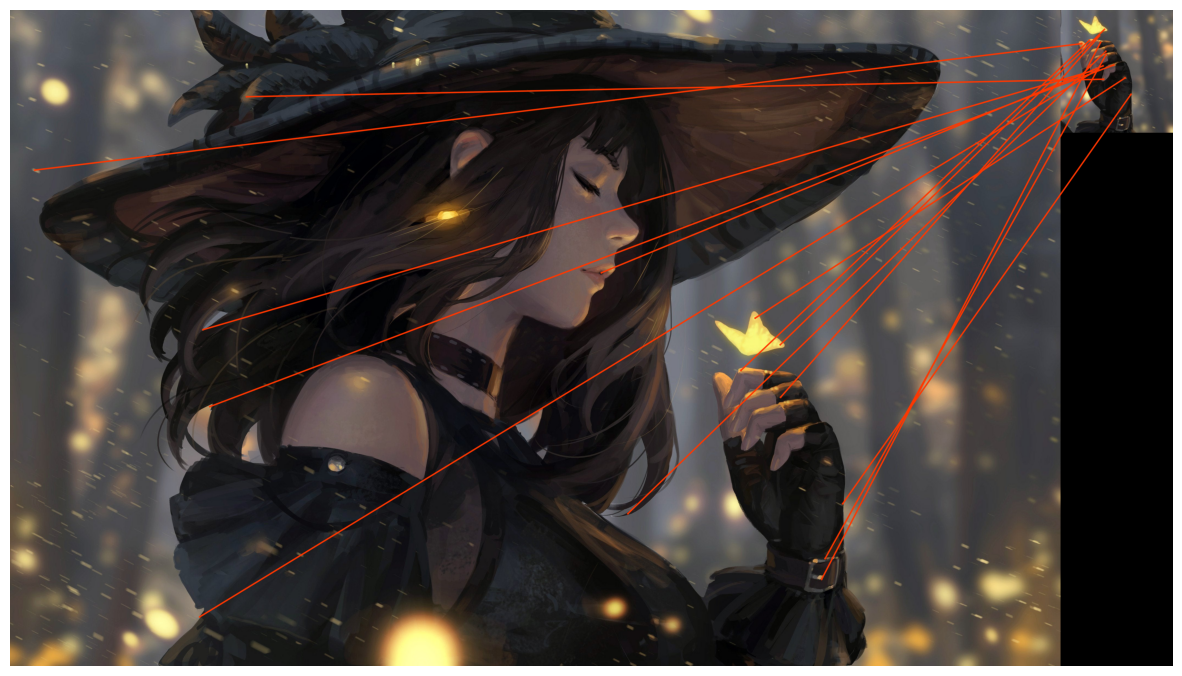

In [22]:
library(img1,img2)

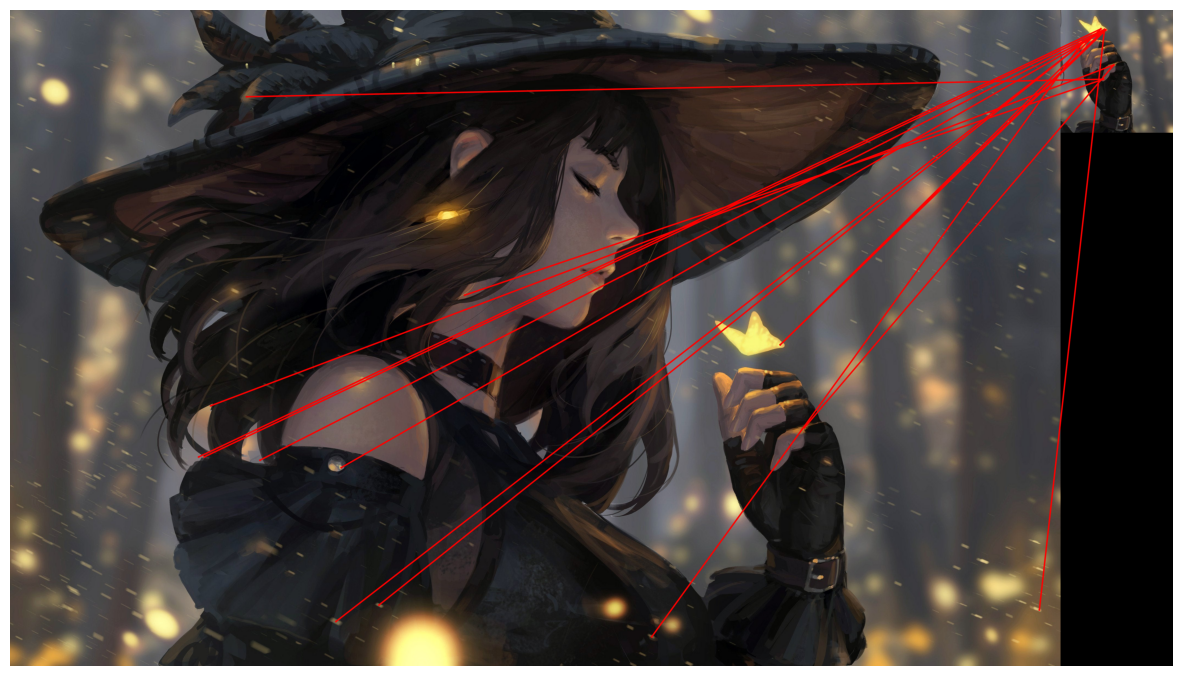

In [23]:
myfunc(img1,img2)

In [24]:
rotated_img_2 = rotateImage(img2)

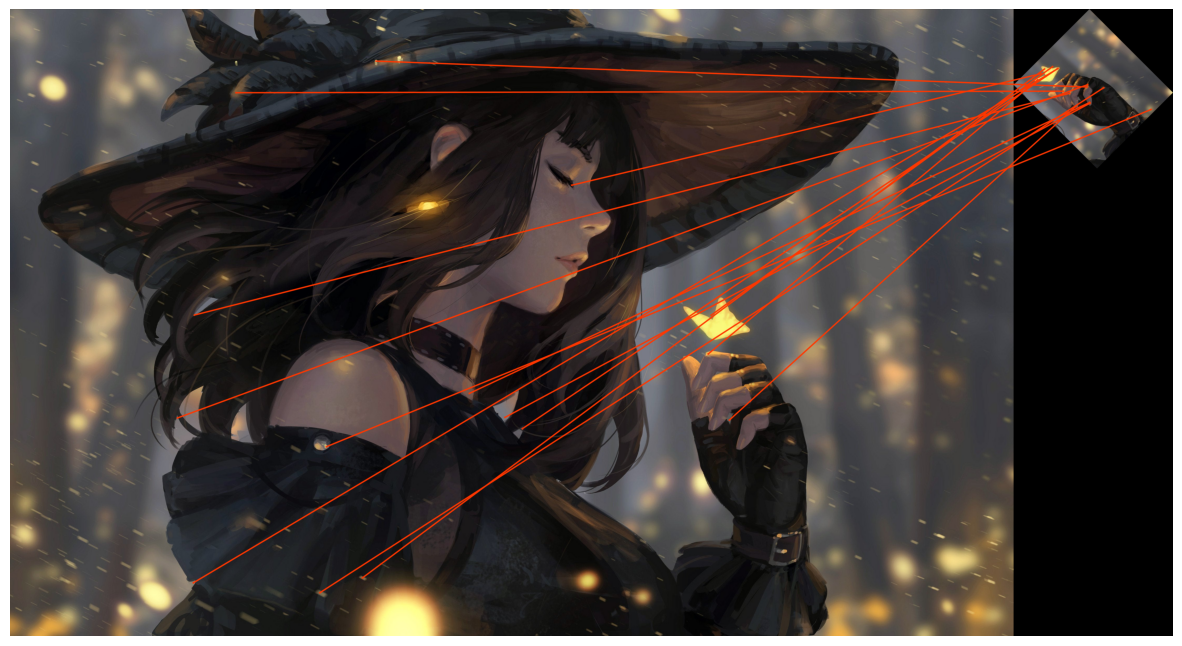

In [25]:
library(img1,rotated_img_2)

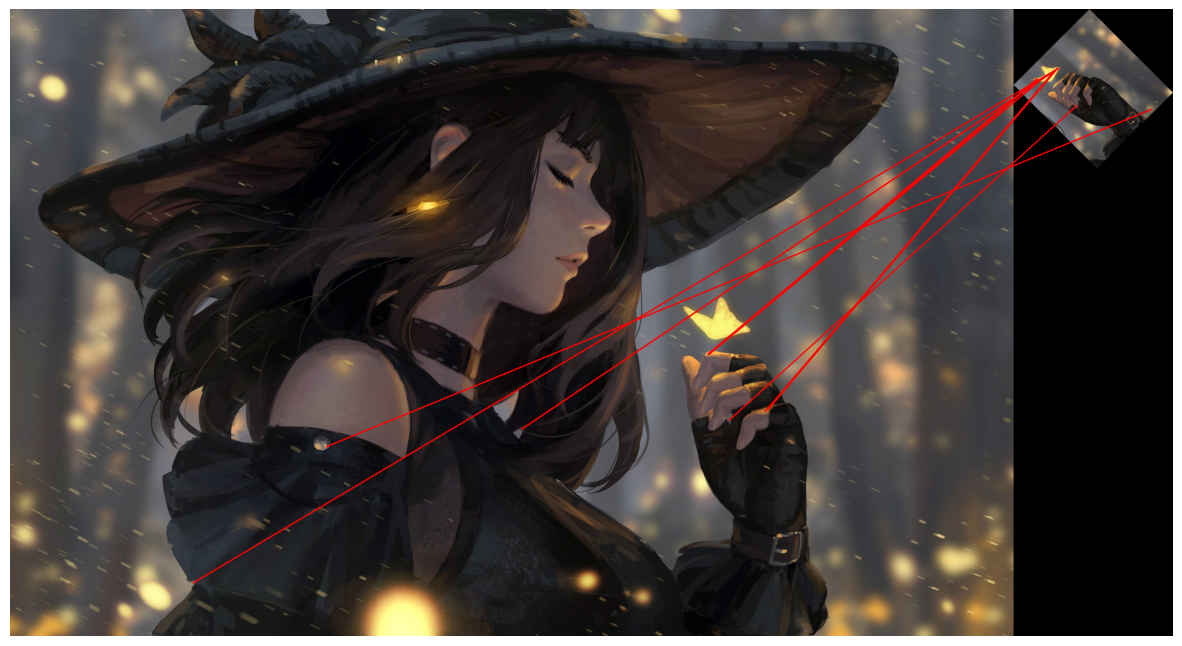

In [26]:
myfunc(img1,rotated_img_2)